## Group:

### Akhila M (E22007)

### Prathmesh Morane (E22027)

### Pushpak Dhangar (E22028)

### IML Assignment: House Price Prediction

##### The objective of this project is to predict the house prices in the King County, Washington from the transaction details of houses sold previously.

#### Hypothesis: Top factors affecting price of house

1. sqft_living
2. sqft_lot
3. number of bedrooms
4. grade
5. condition


In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# reading the file

df=pd.read_csv("train.csv")

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [3]:
# dropping columns sqft_living15 and sqft_lot15 as they are not needed

df=df.drop("sqft_living15",axis=1)
df=df.drop("sqft_lot15",axis=1)

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


In [6]:
# Shape of training data
df.shape

(9761, 19)

In [7]:
# checking for null values and data type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [8]:
# Checking for number of unique values in each variables
    
print('Shape of dataframe: ', df.shape)
for column in df:
    unique_values = np.unique(df[column])
    unique_no = len(unique_values)
    print("The number of unique values for variable {} is {} ".format(column,unique_no ))
    
    

Shape of dataframe:  (9761, 19)
The number of unique values for variable id is 9720 
The number of unique values for variable date is 357 
The number of unique values for variable price is 2323 
The number of unique values for variable bedrooms is 13 
The number of unique values for variable bathrooms is 28 
The number of unique values for variable sqft_living is 730 
The number of unique values for variable sqft_lot is 5581 
The number of unique values for variable floors is 6 
The number of unique values for variable waterfront is 2 
The number of unique values for variable view is 5 
The number of unique values for variable condition is 5 
The number of unique values for variable grade is 11 
The number of unique values for variable sqft_above is 665 
The number of unique values for variable sqft_basement is 251 
The number of unique values for variable yr_built is 116 
The number of unique values for variable yr_renovated is 65 
The number of unique values for variable zipcode is 7

#### As the number of unique values in column id is less than 9761 (total number of rows), it is evident the dataset has data of houses which were sold multiple times in 2014 and 2015.

### Uivariate Analysis

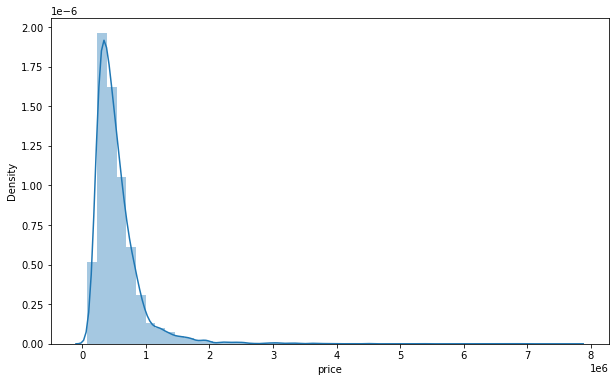

In [9]:
# target variable is price

fig= plt.figure(figsize=(10,6))
sns.distplot(df['price']);


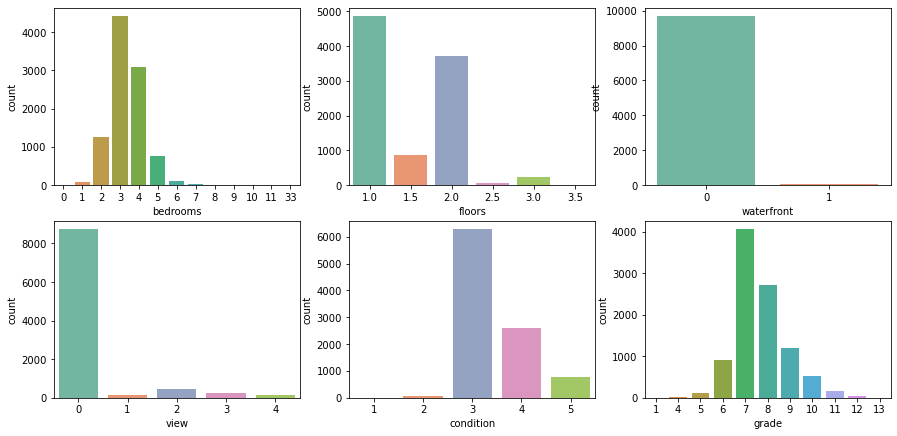

In [10]:
# count plot of categorical variables

plt.figure(figsize = (15,15))
sns.set_palette("Set2")

plt.subplot(4,3,1)
sns.countplot(df.bedrooms)

plt.subplot(4,3,2)
sns.countplot(df.floors)

plt.subplot(4,3,3)
sns.countplot(df.waterfront)

plt.subplot(4,3,4)
sns.countplot(df.view)

plt.subplot(4,3,5)
sns.countplot(df.condition)

plt.subplot(4,3,6)
sns.countplot(df.grade)

plt.show()

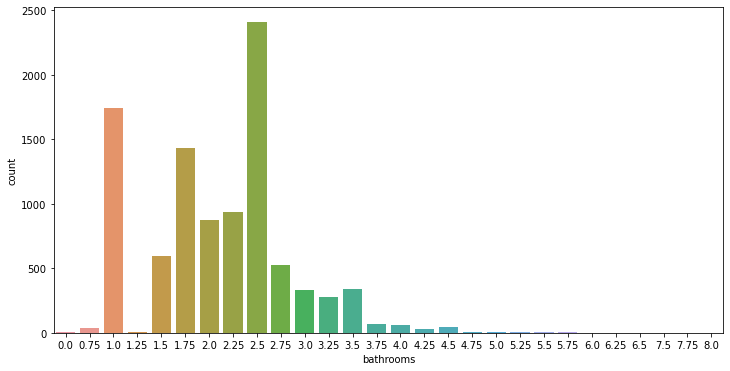

In [11]:
# ploting countplot to find the number of bathroom the house have

plt.figure(figsize = (12,6))
sns.set_palette("Set2")

sns.countplot(df.bathrooms)

plt.show()

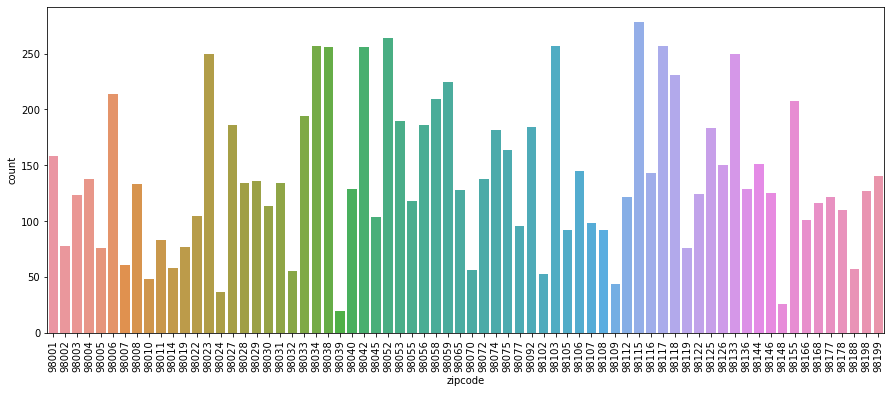

In [12]:
# understanding the houses sold by zipcodes

plt.figure(figsize = (15,6))
sns.set_palette("Set2")

sns.countplot(df.zipcode)
plt.xticks(rotation=90)

plt.show()

### Findings:

Out of the houses that were sold in 2014 and 2015, most houses:

- have 3 bedrooms
- have 1 floor, followed by 2 floors
- don't have any waterbody in the front
- have no good views
- have been ranked 3 for condition which is average
- have average graded of 7 and 8
- have 2.5 bathrooms followed by 1 and 1.75 bathrooms

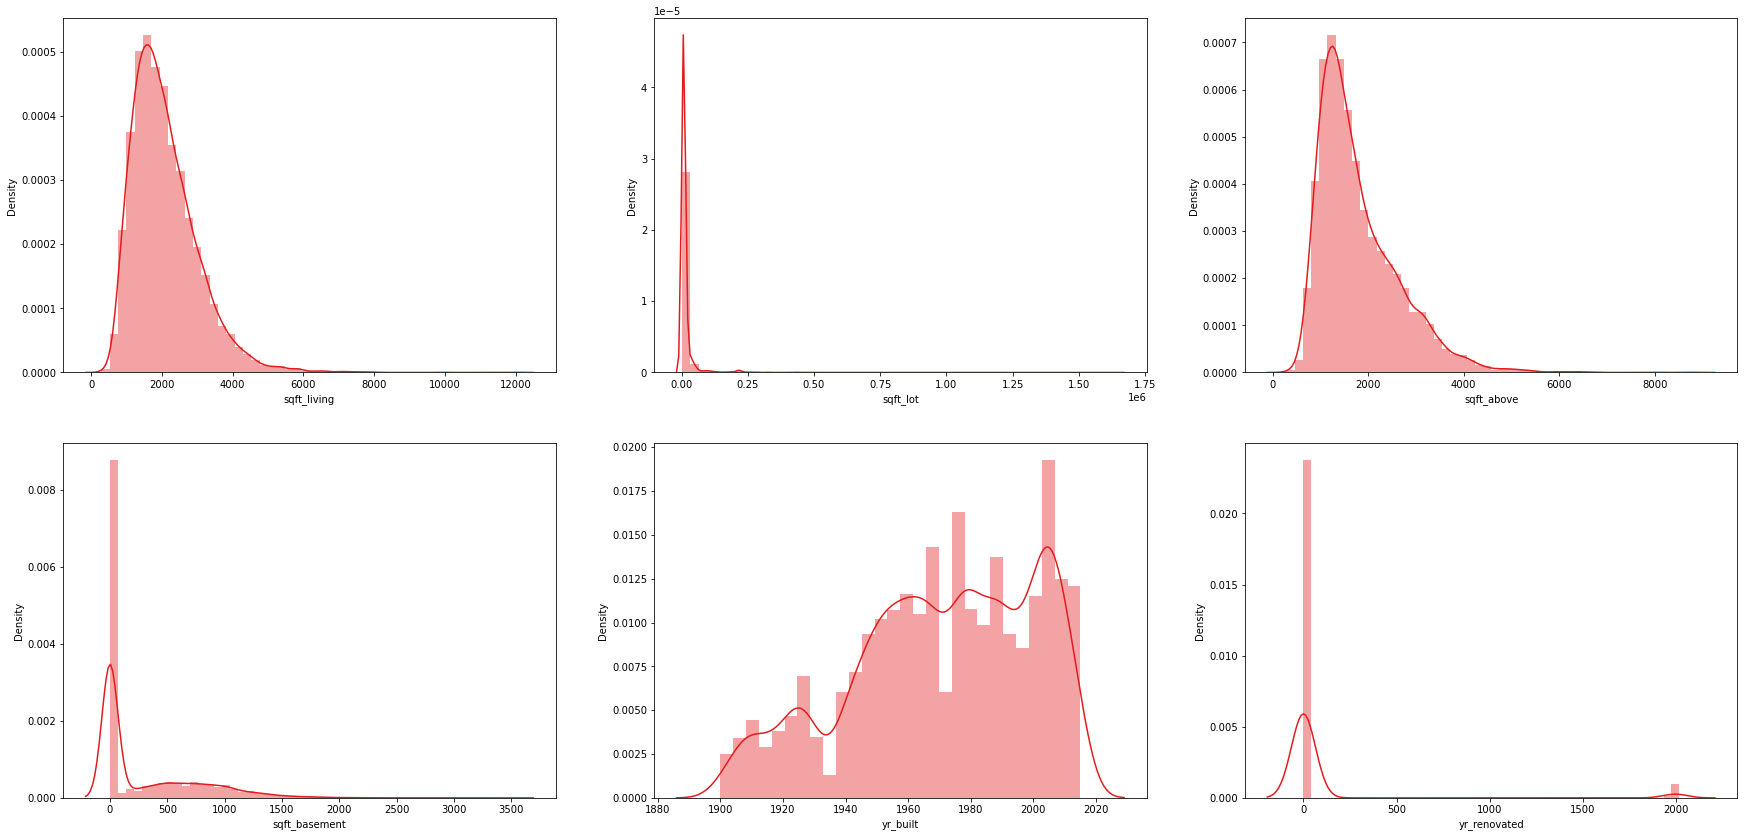

In [13]:
# histogram of non-categorial variables

plt.figure(figsize = (30,30))
sns.set_palette("Set1")


plt.subplot(4,3,1)
sns.distplot(df.sqft_living)

plt.subplot(4,3,2)
sns.distplot(df.sqft_lot)

plt.subplot(4,3,3)
sns.distplot(df.sqft_above)

plt.subplot(4,3,4)
sns.distplot(df.sqft_basement)

plt.subplot(4,3,5)
sns.distplot(df.yr_built)

plt.subplot(4,3,6)
sns.distplot(df.yr_renovated)


plt.show()

### Findings:

Out of the houses that were sold in 2014 and 2015, most houses:

- have living area between 1500 sqft to 2500 sqft
- have no basements
- were built after 1960
- most houses were never renovated

### Bivarite analysis

<AxesSubplot:xlabel='zipcode', ylabel='price'>

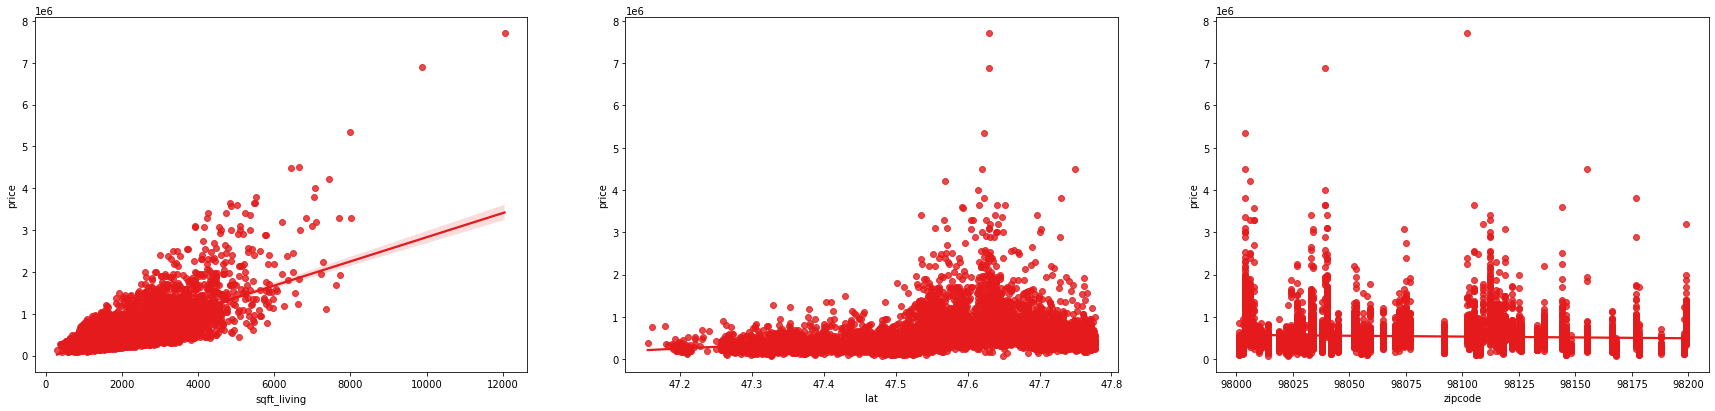

In [19]:
# checking if price has was affected by location of the house

plt.figure(figsize = (30,30))
sns.set_palette("Set1")

plt.subplot(4,3,1)
sns.regplot(df.sqft_living,df.price)

plt.subplot(4,3,2)
sns.regplot(df.lat,df.price)

plt.subplot(4,3,3)
sns.regplot(df.zipcode,df.price)


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

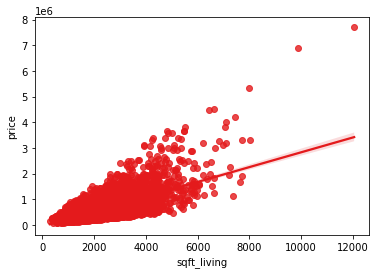

In [18]:
sns.regplot(df.sqft_living,df.price)


Text(0, 0.5, 'Latitude')

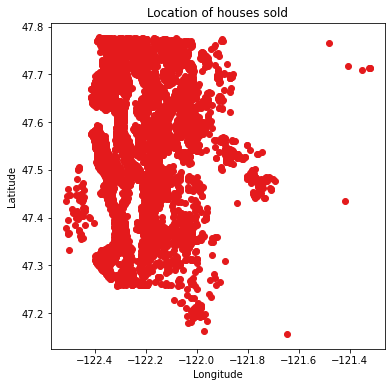

In [16]:
# to understnd the spread of houses that were sold along latitude and longitude

plt.figure(figsize = (6,6))
sns.set_palette("Set1")
plt.scatter(df.long,df.lat)
plt.title("Location of houses sold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Findings:

- Most houses that were sold are located in the same or nearby location.
- ZIpcode doesn't seem to have much affect of price.
- Prices seem to be higher for certain geographical cordinates (lat and long).

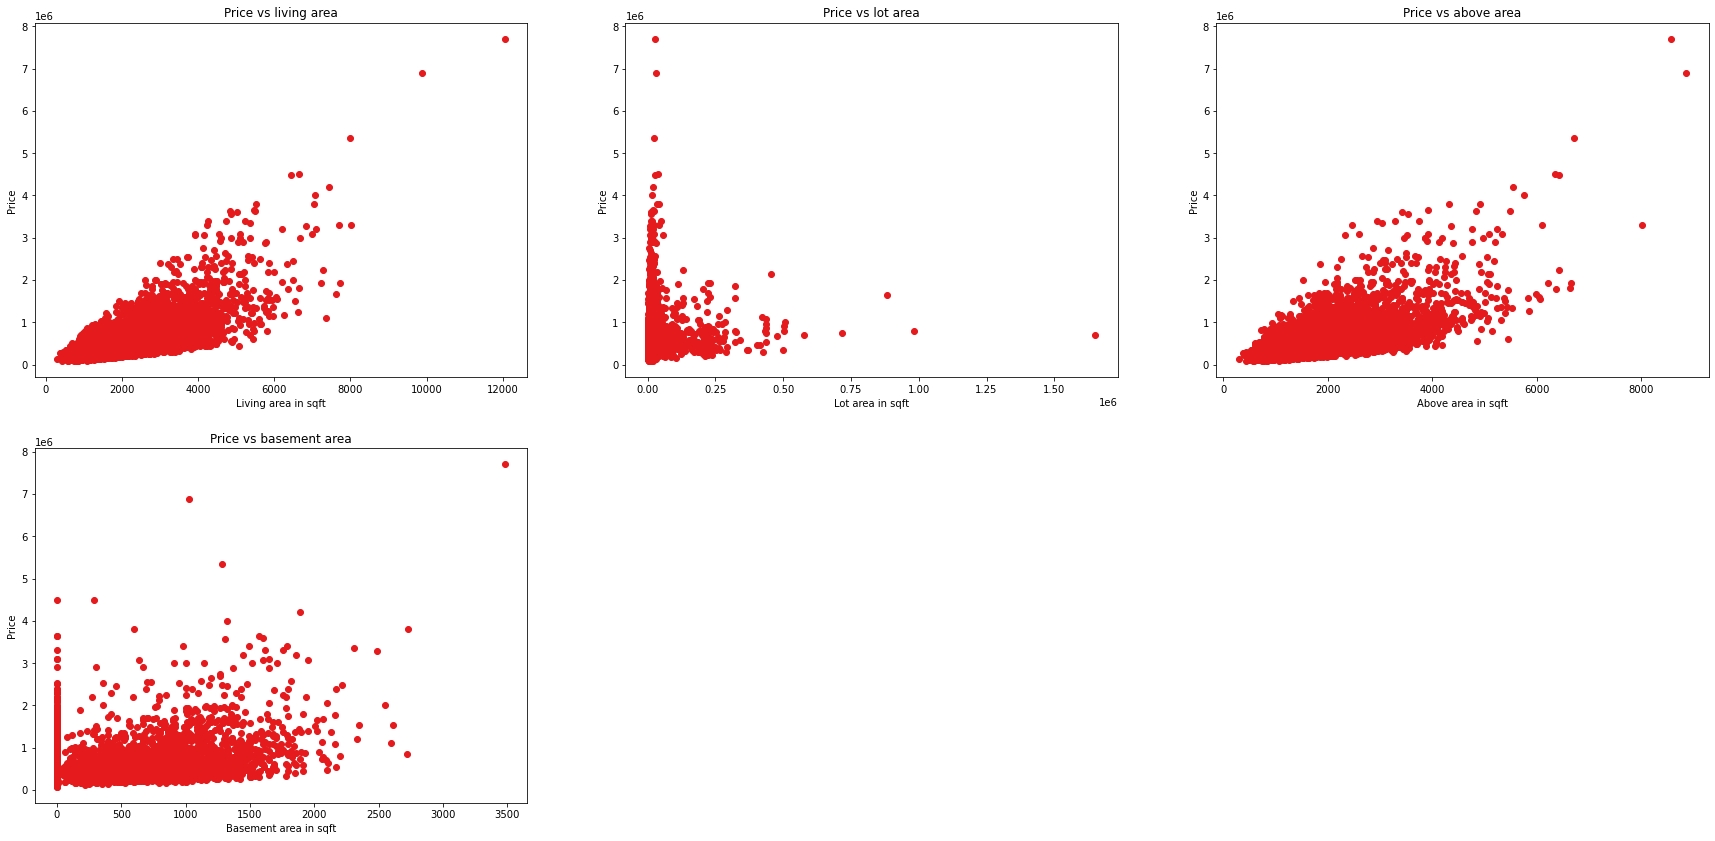

In [17]:
# to understand if price is affected by the area of the house and lot

plt.figure(figsize = (30,30))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.sqft_living,df.price)
plt.title("Price vs living area")
plt.xlabel("Living area in sqft")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.sqft_lot,df.price)
plt.title("Price vs lot area")
plt.xlabel("Lot area in sqft")
plt.ylabel("Price")

plt.subplot(4,3,3)
plt.scatter(df.sqft_above,df.price)
plt.title("Price vs above area")
plt.xlabel("Above area in sqft")
plt.ylabel("Price")

plt.subplot(4,3,4)
plt.scatter(df.sqft_basement,df.price)
plt.title("Price vs basement area")
plt.xlabel("Basement area in sqft")
plt.ylabel("Price")

plt.show()

### Findings:

We can see that the area of the house is affecting price. Price and area in sqft are possitively corelated.
    

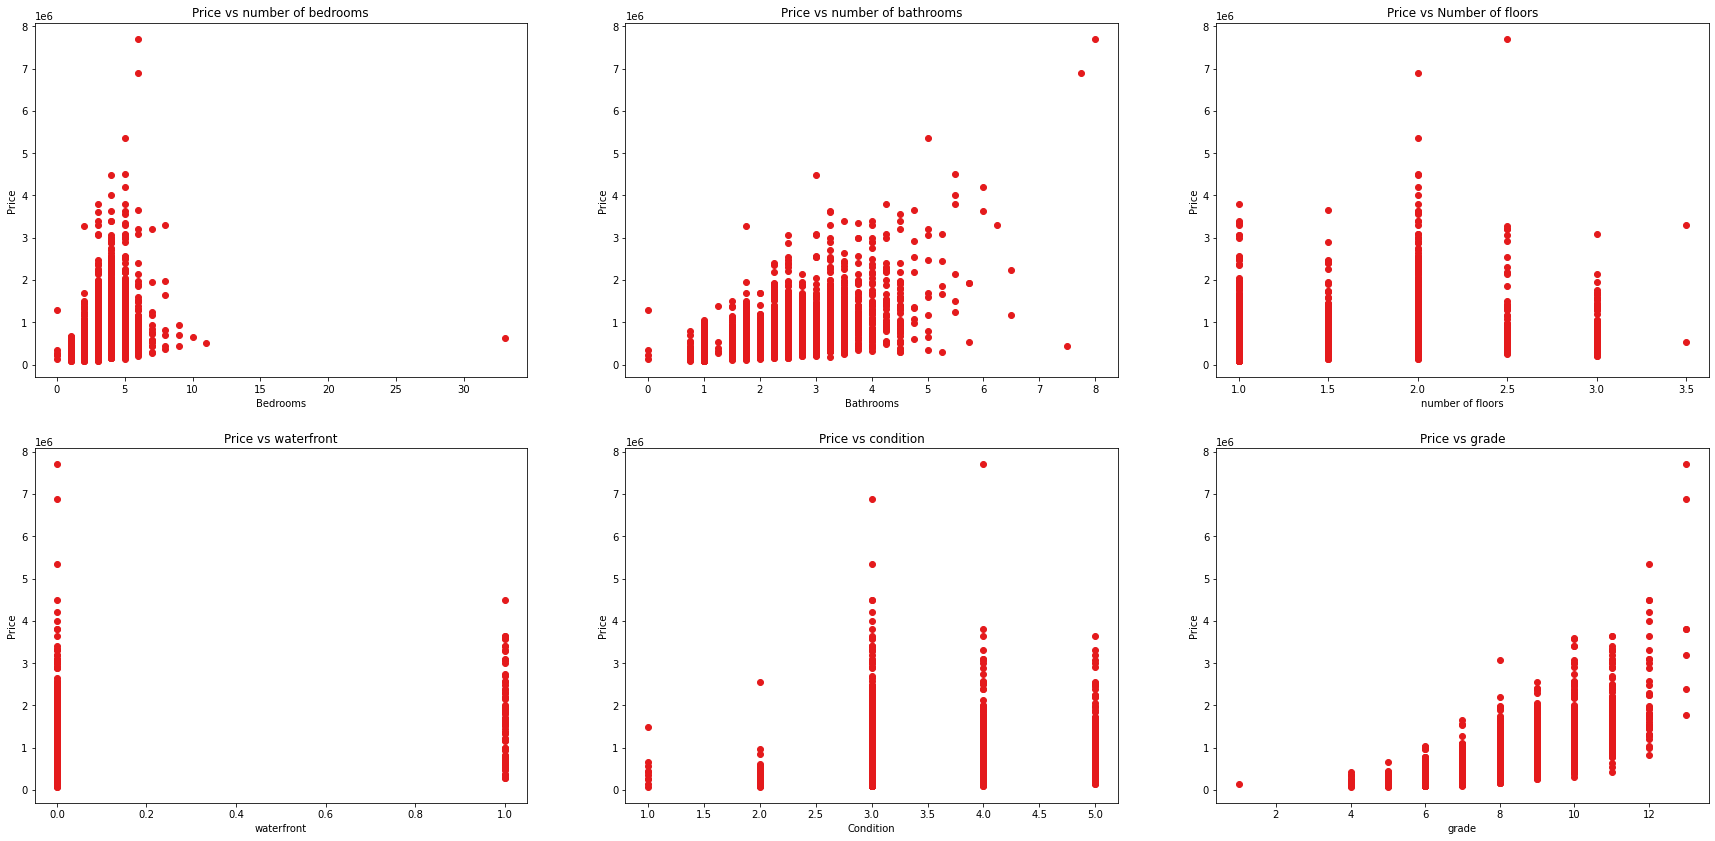

In [712]:
# understanding how other features of the house affect the price

plt.figure(figsize = (30,30))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.bedrooms,df.price)
plt.title("Price vs number of bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.bathrooms,df.price)
plt.title("Price vs number of bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")

plt.subplot(4,3,3)
plt.scatter(df.floors,df.price)
plt.title("Price vs Number of floors")
plt.xlabel("number of floors")
plt.ylabel("Price")

plt.subplot(4,3,4)
plt.scatter(df.waterfront,df.price)
plt.title("Price vs waterfront")
plt.xlabel("waterfront")
plt.ylabel("Price")

plt.subplot(4,3,5)
plt.scatter(df.condition,df.price)
plt.title("Price vs condition")
plt.xlabel("Condition")
plt.ylabel("Price")

plt.subplot(4,3,6)
plt.scatter(df.grade,df.price)
plt.title("Price vs grade")
plt.xlabel("grade")
plt.ylabel("Price")


plt.show()

### Findings:

- We can see that number of bedrooms, bathrooms and grade of the house are possitively corelated to price. As the number of bedrooms and bathroom and grade of the house increases, the price of the house increases.

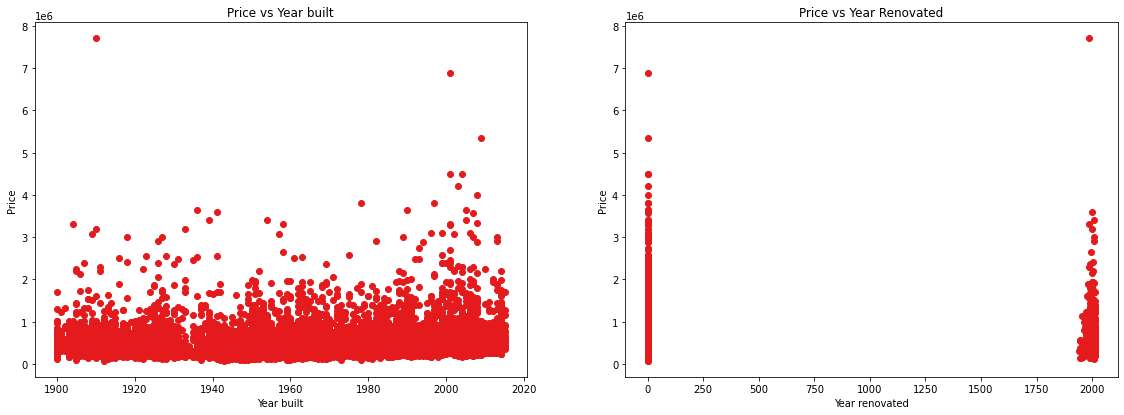

In [448]:
# to understand if year built and renovated year has any affect on the priceof houses

plt.figure(figsize = (30,30))
sns.set_palette("Set1")

plt.subplot(4,3,1)
plt.scatter(df.yr_built,df.price)
plt.title("Price vs Year built")
plt.xlabel("Year built")
plt.ylabel("Price")

plt.subplot(4,3,2)
plt.scatter(df.yr_renovated,df.price)
plt.title("Price vs Year Renovated")
plt.xlabel("Year renovated")
plt.ylabel("Price")

plt.show()

### Findings:

- We can see that year built and year the house was renovated doesn't affect the price much.

### Corelation matrix

In [449]:
corr=df.corr()
corr.style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514


### Overall Infernece:

- From the bivariate analysis, we found the following variables are affecting prices of houses:
   - Living area in sqft
   - Grade of the house
   - Area above in sqft ( attic area)
   - Number of bathrooms
   - number of bedrooms
   

### Models

We are creating 3 different Decision tree models using different combination of predictors:

- Model 1:
   - Living area in sqft
   - Grade of the house
   - Area above in sqft ( attic area)
   - Number of bathrooms
   - number of bedrooms

- Model 2:
   - Living area in sqft
   - Lot area in sqft
   - Grade of the house
   - Condition of the house
   - number of bedrooms
   
- Model 3:
   - Floor
   - Condition of the house
   - Lot area in sqft
   - year it was built
   - year it was renovated

### Experiment 1:

For this experiment we have selected the features that are highly correlated with price based on the correlation matrix.

We found that, by using using these features, we get an error rate of atleast 31%. We will continuing to build models with other feature combinations to see we if we could build a model with lesser error rate.

In [450]:
# selecting these predictors as these are highly correlated with price based on our earlier analysis

# splitting the dataframe into predictors and target variable

df_m1_X=df[["sqft_living","grade","sqft_above","bathrooms","bedrooms"]]
df_m1_y=df.price


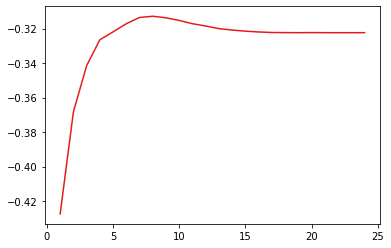

In [451]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent1=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m1_X,df_m1_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent1.append(score.mean())

plt.plot(depth,mae_percent1)

In [452]:
print(mae_percent)
print("\nLeast error: ",np.max(mae_percent))


[-0.4274103024199693, -0.36828917559481267, -0.3414989111311467, -0.32648149242071317, -0.3219000600258598, -0.31717060676643316, -0.31352777470246845, -0.31285410563842064, -0.31379232788527783, -0.3153067621491631, -0.3171864830613539, -0.31869740789842976, -0.32010301698424537, -0.32087074027183843, -0.3215377735218041, -0.3219590019759119, -0.32235161595854434, -0.32227928474415635, -0.3224296756014816, -0.32238873346942293, -0.32240050357288347, -0.32242692556917063, -0.3224366223826417, -0.3222752520900193]

Least error:  -0.31285410563842064


#### Best depth for this model would be 8 as it has the least error percentage

### Experiment 2:

For this experiment we have selected the features that are we thought would affect the price as our initial guess.

We found that, by using using these features, we get an error rate of atleast 29.9%. We will continuing to build models with other feature combinations to see we if we could build a model with lesser error rate.

In [453]:
# selecting these predictors as these predictors were our initial guess

# selecting dataframes of predictrs and target

df_m2_X=df[["sqft_living","condition","sqft_lot","grade","bedrooms"]]
df_m2_y=df.price


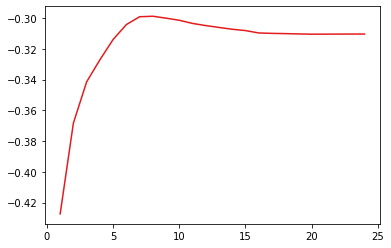

In [454]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent2=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m2_X,df_m2_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent2.append(score.mean())

plt.plot(depth,mae_percent2)

In [455]:
print(mae_percent2)
print("\nLeast error: ",np.max(mae_percent2))


[-0.4274103024199693, -0.36828917559481267, -0.3414989111311467, -0.32718315219976335, -0.31395414535061883, -0.3042591697568214, -0.2991450692454882, -0.2988188513527829, -0.30006245590584313, -0.30143685633365236, -0.30348966063559707, -0.3048953829546521, -0.30610475763140027, -0.30727750456015557, -0.3081478002298277, -0.3096881095753097, -0.3099631351369931, -0.3101164615344792, -0.31032570226758494, -0.3104920287434879, -0.3104691797458209, -0.31042315280484056, -0.31040135978882033, -0.310405102857834]

Least error:  -0.2988188513527829


#### Best depth for this model would be 8 as it has the least error percentage

### Experiment 3:

For this experiment we have selected the features that are least correlated with price based on the correlation matrix.

We found that, by using using these features, we get an error rate of atleast 43%. We will continuing to build models with other feature combinations to see we if we could build a model with lesser error rate.

In [456]:
# selecting these predictors as these seem to have least correlation with price

# selecting dataframes of predictrs and target

df_m3_X=df[["yr_renovated","condition","sqft_lot","yr_built","floors"]]
df_m3_y=df.price


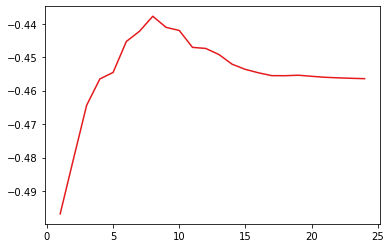

In [457]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent3=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m3_X,df_m3_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent3.append(score.mean())

plt.plot(depth,mae_percent3)

In [458]:
print(mae_percent3)
print("\nLeast error: ",np.max(mae_percent3))

[-0.4968356615948216, -0.48049884654474706, -0.4643827148827614, -0.45649685980124166, -0.4545619850729718, -0.445311389995824, -0.4422365421985145, -0.43776794477088743, -0.44108787020434415, -0.442018402885578, -0.4470706224921699, -0.44738717937168265, -0.44921401113542425, -0.4521181785152103, -0.45365105209101764, -0.4546814716641715, -0.45552233617388593, -0.45553677667606224, -0.4553949171335683, -0.4557140179543143, -0.4560078444609198, -0.4561728476839308, -0.4563099435577677, -0.45642274550076645]

Least error:  -0.43776794477088743


#### Best depth for this model would be 8 as it has the least error percentage

### Experiment 4

For this experiment, we will build a model that has most of the features instead of combination of just 5 features and see if we could reduce the error rate of the model.



In [721]:
# selecting features as predictors and target

df_m4_X=df.drop(["id"],axis=1)
df_m4_X=df_m4_X.drop(["date"],axis=1)
df_m4_X=df_m4_X.drop(["price"],axis=1)
df_m4_X=df_m4_X.drop(["yr_renovated"],axis=1)
df_m4_y=df.price

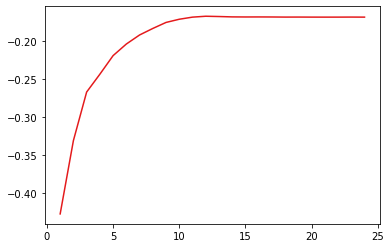

In [723]:
# finding the best depth of the tree to get the least error

depth=np.arange(1,25)
mae_percent4=[]

for i in depth:

    dtr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=10)
    score=cross_val_score(dtr,df_m4_X,df_m4_y,cv=10,scoring="neg_mean_absolute_percentage_error")
    mae_percent4.append(score.mean())

plt.plot(depth,mae_percent4)
plt.show()

In [724]:
print(mae_percent4)
print("\nLeast error: ",np.max(mae_percent4))

[-0.4274103024199693, -0.3310881097027129, -0.2672800035675123, -0.24383181827650852, -0.21940643448045702, -0.20417428835512647, -0.1922897966776574, -0.18371439678252194, -0.17579998201038355, -0.17160023444000763, -0.1688339351859659, -0.16766300790506422, -0.16803516522409176, -0.1685116806264349, -0.1686230045776837, -0.16857715353418787, -0.16863765753225923, -0.16877363508002957, -0.168740676012942, -0.1688043391126212, -0.16882973113432675, -0.16881630093908814, -0.16875416301433355, -0.16883165125546915]

Least error:  -0.16766300790506422


#### Best depth for this model would be 11 as it has the least error percentage.

#### Model 4 is the best model so far as this has the least error rate when compared to other models that we experimented with earlier.

### Hyperparameter Tuning with original data

In [21]:
# importing libraries to fit decision tree models

from sklearn.tree import DecisionTreeRegressor

from sklearn import tree

### Experiment 5:

For the 4 models that we built earlier, we had set the min_samples_leaf at 10 and tried to get least error by changing the depth of the decision tree. In this experiment, we are trying to get the least error by adjusting both depth and min_samples_leaf together.

### Model 1

In [22]:
# selecting these predictors as these are highly correlated with price based on our earlier analysis

# splitting the dataframe into predictors and target variable

df_m1_X=df[["sqft_living","grade","sqft_above","bathrooms","bedrooms"]]
df_m1_y=df.price



In [23]:
# Importing libraries

from sklearn.model_selection import GridSearchCV

# using GridSearchCV fro cross validation
model1= DecisionTreeRegressor()

# MAE
gs1=GridSearchCV(model1,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs1.fit(df_m1_X,df_m1_y)

print(gs1.best_params_)
print(-gs1.best_score_)
model1_mae=-gs1.best_score_

{'max_depth': 7, 'min_samples_leaf': 20}
155054.77314632048


In [24]:
# MAE percentage

gs1=GridSearchCV(model1,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs1.fit(df_m1_X,df_m1_y)

print(gs1.best_params_)
print(-gs1.best_score_)
model1_mape=-gs1.best_score_

{'max_depth': 9, 'min_samples_leaf': 30}
0.3118084287132823


#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 9 and 30 for this model. IF we would want to improve this model, we have to set the parameters to 9 and 30 instead of 8 and 10 as we did in experiment 1. 

### Model 2

In [25]:
# selecting these predictors as these predictors were our initial guess

# selecting dataframes of predictrs and target

df_m2_X=df[["sqft_living","condition","sqft_lot","grade","bedrooms"]]
df_m2_y=df.price


In [26]:
# cross Validation

# using GridSearchCV fro cross validation
model2= DecisionTreeRegressor()

# MAE
gs2=GridSearchCV(model2,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs2.fit(df_m2_X,df_m2_y)

print(gs2.best_params_)
print(-gs2.best_score_)
model2_mae= -gs2.best_score_

{'max_depth': 7, 'min_samples_leaf': 10}
149430.71011758246


In [27]:
# MAE percentage

gs2=GridSearchCV(model1,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs2.fit(m2_X_scaled,df_m2_y)

print(gs2.best_params_)
print(-gs2.best_score_)
model2_mape= -gs2.best_score_

NameError: name 'm2_X_scaled' is not defined

#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 10 and 20 for this model. If we would want to improve this model, we have to set the parameters to 10 and 20 instead of 8 and 10 as we did in experiment 2. 

### Model 3

In [ ]:
# selecting these predictors as these seem to have least correlation with price

# selecting dataframes of predictrs and target

df_m3_X=df[["yr_renovated","condition","sqft_lot","yr_built","floors"]]
df_m3_y=df.price


In [ ]:
# cross Validation

# using GridSearchCV fro cross validation
model3= DecisionTreeRegressor()

# MAE
gs3=GridSearchCV(model3,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs3.fit(df_m3_X,df_m3_y)

print(gs3.best_params_)
print(-gs3.best_score_)
model3_mae= -gs3.best_score_

In [ ]:
# MAE percentage
gs3=GridSearchCV(model3,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs3.fit(df_m3_X,df_m3_y)

print(gs3.best_params_)
print(-gs3.best_score_)
model3_mape= -gs3.best_score_

#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 8 and 20 for this model. If we would want to improve this model, we have to set the parameters to 8 and 20 instead of 8 and 10 as we did in experiment 3. 

### Model 4

Considering all the above predictors 

In [655]:
# selecting features as predictors and target

df_m4_X=df[["bedrooms","bathrooms","sqft_living","sqft_lot","view","grade","condition",
            "sqft_above","sqft_basement","floors","lat","long","yr_built","waterfront","zipcode"]]
df_m4_y=df.price

In [20]:
# using GridSearchCV fro cross validation
model4= DecisionTreeRegressor()

# MAE
gs4=GridSearchCV(model4,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_error')

# fitting grid search
gs4.fit(df_m4_X,df_m4_y)

print(gs4.best_params_)
print(-gs4.best_score_)
model4_mae=-gs4.best_score_

NameError: name 'GridSearchCV' is not defined

In [657]:
# MAE
gs4=GridSearchCV(model4,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4.fit(df_m4_X,df_m4_y)

print(gs4.best_params_)
print(-gs4.best_score_)
model4_mape=-gs4.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.16763655417093276


#### Error Rate didn't improve much but, we found that the best combination of depth and mi_smaples_leaf is 12 and 10 for this model. If we would want to improve this model, we have to set the parameters to 102and 10 instead of 11 and 10 as we did in experiment 4. 

In [658]:
print("MAE of model 1: ",model1_mae)
print("MAE of model 2: ",model2_mae)
print("MAE of model 3: ",model3_mae)
print("MAE of model 4: ",model4_mae)

print("\nMAPE % of model 1: ",model1_mape)
print("MAPE % of model 2: ",model2_mape)
print("MAPE % of model 3: ",model3_mape)
print("MAPE % of model 4: ",model4_mape)

MAE of model 1:  155054.77314632048
MAE of model 2:  149430.71011758246
MAE of model 3:  205798.46124838773
MAE of model 4:  93496.89649832365

MAPE % of model 1:  0.3118347291368528
MAPE % of model 2:  0.2982061895928009
MAPE % of model 3:  0.43617472712625965
MAPE % of model 4:  0.16763655417093276


#### Model 4 which is taking all predictors except year renovated has the lowest error and hence, we can say it is the best model.

### Feature Engineering

Experimenting to see if tranforming the features would help in building a better model.

In [523]:
# making a copy of the data

copy_df=df.copy()

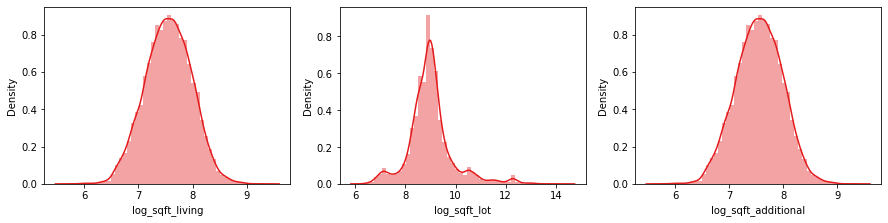

In [524]:
# transforming sqft_living and sqft_lot into log

copy_df[["log_sqft_living"]]=np.log(copy_df[["sqft_living"]])
copy_df[["log_sqft_lot"]]=np.log(copy_df[["sqft_lot"]])

# considering area of attic and basement together as additional sqft and adding it as a new column

copy_df["log_sqft_additional"]=np.log(copy_df["sqft_above"] + copy_df["sqft_basement"])

# plotiing three new columns to understand their distribution
plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
sns.distplot(copy_df.log_sqft_living)


plt.subplot(4,3,2)
sns.distplot(copy_df.log_sqft_lot)

plt.subplot(4,3,3)
sns.distplot(copy_df.log_sqft_additional)

plt.show()

In [525]:
# creating a new feature age of the house using the features date sold and year built

copy_df["age_of_house"]=pd.to_numeric(copy_df['date'].str[:4])-copy_df["yr_built"]

copy_df

# dropping unnecessary features from the copy_df dataframe

copy_df=copy_df.drop(["id","date"],axis=1)
copy_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_sqft_living,log_sqft_lot,log_sqft_additional,age_of_house
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,7.580700,8.517193,7.580700,49
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,1530,2001,0,98053,47.6561,-122.005,8.597851,11.532042,8.597851,13
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,300,1942,0,98115,47.6900,-122.292,7.056175,8.699515,7.056175,72
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,1927,0,98028,47.7558,-122.229,7.265430,9.898525,7.265430,87
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,0,1977,0,98074,47.6127,-122.045,7.222566,9.177817,7.222566,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,...,0,2014,0,98144,47.5699,-122.288,7.306531,7.026427,7.306531,1
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,...,0,2014,0,98056,47.5137,-122.167,7.832014,8.703341,7.832014,0
9758,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,...,910,2009,0,98136,47.5537,-122.398,8.163371,8.881836,8.163371,6
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,6.927558,7.207860,6.927558,5


### Hyperparameter Tuning using data with transformed features

### Experiment 6:

Building a model by replcing the feature sqft_living and sqft_lot in model 4 with log_sqft_living and log_sqft_lot and sqft_above and sqft_basement with log_sqft_additional.

In [731]:
# spliting the transformed data in to predictors and target

df_m4_tf_X=copy_df[["bedrooms","bathrooms","log_sqft_living","log_sqft_lot","view","grade","condition",
            "log_sqft_additional","floors","lat","long","age_of_house","waterfront","zipcode"]]
df_m4_tf_y=copy_df.price


In [728]:
# using GridSearchCV fro cross validation
model4_tf= DecisionTreeRegressor()

# MAPE
gs4_tf=GridSearchCV(model4_tf,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4_tf.fit(df_m4_tf_X,df_m4_tf_y)

print(gs4_tf.best_params_)
print(-gs4_tf.best_score_)
model4_mape_tf=-gs4_tf.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.16813812066701528


### Experiment 8:

Building a model by replacing the feature sqft_living and sqft_lot in model 4 with log_sqft_living and log_sqft_lot.

In [667]:
# spliting the transformed data in to predictors and target

df_m4_tf_X=copy_df[["bedrooms","bathrooms","log_sqft_living","log_sqft_lot","view","grade","condition",
            "sqft_above","sqft_basement","floors","lat","long","age_of_house","waterfront","zipcode"]]
df_m4_tf_y=copy_df.price


In [670]:
# using GridSearchCV fro cross validation
model4_tf= DecisionTreeRegressor()

# MAPE
gs4_tf=GridSearchCV(model4_tf,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4_tf.fit(df_m4_tf_X,df_m4_tf_y)

print(gs4_tf.best_params_)
print(-gs4_tf.best_score_)
model4_mape_tf=-gs4_tf.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.1681862568479362


### Experiment 9:

Building a model by replacing the feature sqft_above and sqft_basement in model 4 with log_sqft_additional.

In [729]:
# spliting the transformed data in to predictors and target

df_m4_tf_X=copy_df[["bedrooms","bathrooms","sqft_living","sqft_lot","view","grade","condition",
            "log_sqft_additional","floors","lat","long","age_of_house","waterfront","zipcode"]]
df_m4_tf_y=copy_df.price


In [730]:
# using GridSearchCV fro cross validation
model4_tf= DecisionTreeRegressor()

# MAPE
gs4_tf=GridSearchCV(model4_tf,param_grid={"max_depth":range(5,16),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs4_tf.fit(df_m4_tf_X,df_m4_tf_y)

print(gs4_tf.best_params_)
print(-gs4_tf.best_score_)
model4_mape_tf=-gs4_tf.best_score_

{'max_depth': 12, 'min_samples_leaf': 10}
0.16816802077423842


#### There is no much difference between models built with original features and transformed features as the change in error is negligible. Hence, we would consider a model without feature transformation to test with test data.

### Experiment: 10

#### Using Random Forest Regressor to select the predictors

Using Random forest regressor and select from model to get the top features that would help in predicting the target.

In [697]:
# importing libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

df_X=df.drop(["price","id","date"],axis=1)
df_y=df.price


In [702]:
# finding the best features set 
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(df_X, df_y)

selected_feat= df_X.columns[(sel.get_support())]
print(selected_feat)

Index(['sqft_living', 'grade', 'lat', 'long'], dtype='object')


In [703]:
df_sel_X=df_X[["sqft_living","grade","lat","long"]]
df_sel_y=df.price

In [706]:
# hyperparameter tuning using the selected features

model_sel= DecisionTreeRegressor()

# MAPE
gs_sel=GridSearchCV(model_sel,param_grid={"max_depth":range(5,20),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='neg_mean_absolute_percentage_error')

# fitting grid search
gs_sel.fit(df_sel_X,df_sel_y)

print(gs_sel.best_params_)
print(-gs_sel.best_score_)


{'max_depth': 13, 'min_samples_leaf': 10}
0.17079839202037586


##### We could see that there is very little difference in the error (MAPE) of the model 4 and experiment 10. SInce model 4 is giving lesser error, we chose that as our final model.

### We are slecting model 4 with depth 12 and minsmaples_leaf 10 as the best model.

### Testing the model with test data

In [679]:
# reading the test data

df_test=pd.read_csv(r"/Users/akhilam/Desktop/Term 1/IML/endterm assignment/kc_house_test_data.csv")

In [720]:
# slecting features to be fit the model

df_test_X=df_test[["bedrooms","bathrooms","sqft_living","sqft_lot","view","grade","condition",
            "sqft_above","sqft_basement","floors","lat","long","yr_built","waterfront","zipcode"]]
df_test_y=df_test.price

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,condition,sqft_above,sqft_basement,floors,lat,long,yr_built,waterfront,zipcode
0,3,2.50,1890,6560,0,7,3,1890,0,2.0,47.3684,-122.031,2003,0,98038
1,5,2.00,1810,4850,0,7,3,1810,0,1.5,47.6700,-122.394,1900,0,98107
2,2,1.00,1200,9850,0,7,4,1200,0,1.0,47.3089,-122.210,1921,0,98002
3,4,1.75,2330,5000,0,7,4,1510,820,1.5,47.6823,-122.368,1929,0,98117
4,4,1.00,1220,8075,0,7,2,890,330,1.0,47.3341,-122.282,1969,0,98001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,4,2.50,1980,5020,0,7,3,1980,0,2.0,47.5147,-122.190,2007,0,98056
2213,3,2.50,2198,6222,2,8,3,2198,0,2.0,47.3906,-122.304,2010,0,98198
2214,4,3.50,2850,5577,0,8,3,1950,900,2.0,47.5252,-122.192,2014,0,98056
2215,3,1.75,1140,1201,0,8,3,1140,0,2.0,47.5637,-122.295,2014,0,98108


In [685]:
# testing the model on test dataset

dt=DecisionTreeRegressor(max_depth=12,min_samples_leaf=10)
dt.fit(df_m4_X,df_m4_y)
dt_pred=dt.predict(df_test_X)

mape=np.mean(np.abs((df_test_y-dt_pred)/df_test_y))*100
mape

16.73811353124831

#### The model that we selected gives 16.74% error (MAPE) on test data which is very close to the MAPE value that we got on training dataset. 

#### Plotiing the Decision Tree of our final model on test data.

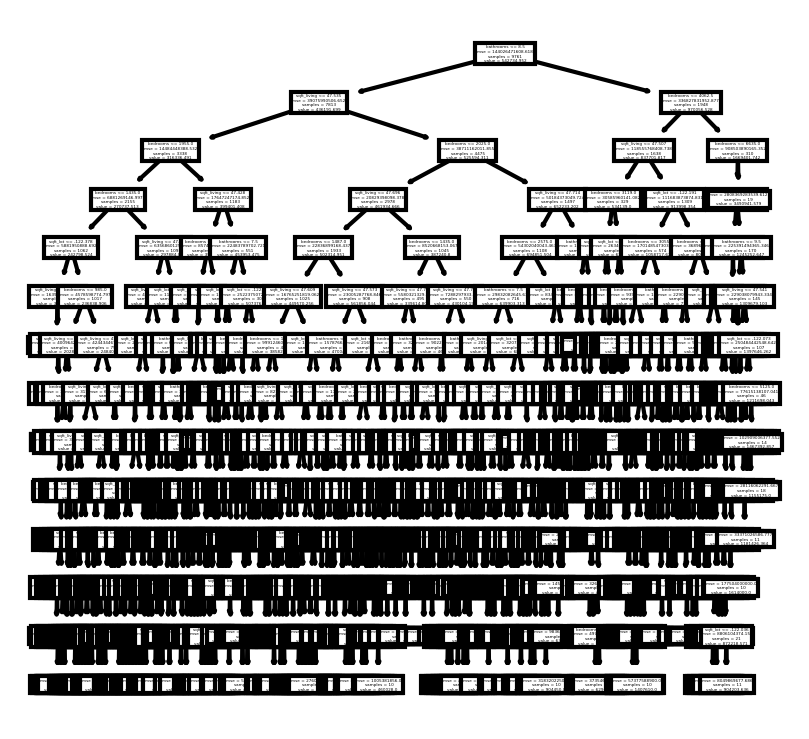

In [732]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(dt, feature_names=list(df_test_X), filled = False)

plt.show()